# PyTorch Lab for Machine Learning (Please note that this is a markdown cell. To execute codes, you need to copy them in a new code cell)

## Introduction

Welcome to this hands-on lab on **PyTorch**, a powerful and flexible deep learning framework. This lab is designed to help you understand essential PyTorch concepts fundamental for machine learning tasks. By the end of this lab, you will:

- Understand how to use PyTorch tensors and perform basic operations.
- Learn about broadcasting, matrix manipulations like dot products and views.
- Build a simple one-layer neural network from scratch for a binary classification problem.

Throughout the lab, you’ll find questions to evaluate your understanding. Make sure to attempt them to reinforce your learning.

## Table of Contents

1. PyTorch Basics
	- Importing PyTorch
	- Tensors and Tensor Operations
	- **Questions**
2. Broadcasting in PyTorch
	- Understanding Broadcasting Rules
	- Examples of Broadcasting
	- **Questions**
3.	Matrix Manipulation
	- Dot Product
	- Matrix Multiplication
	- Tensor Views and Reshaping
	- **Questions**
4.	Building a Simple Neural Network
	- Problem Definition
	- Data Preparation
	- Model Implementation
	- Training the Model
	- Evaluating the Model


# PyTorch Basics

## Importing PyTorch

First, let’s import the PyTorch library:
```python
import torch
```

## Tensors and Tensor Operations

A **tensor** is a multi-dimensional array and the basic data structure in PyTorch. Tensors are similar to NumPy arrays but can run on GPUs, which makes them suitable for deep learning.

**Creating Tensors**

You can create tensors from Python lists or NumPy arrays:
```python
# From a list
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

# From a NumPy array
import numpy as np
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
```

**Basic Operations**

You can perform arithmetic operations on tensors:

```python
# Addition
x = torch.tensor([1, 2, 3])
y = torch.tensor([4, 5, 6])
z = x + y  # or torch.add(x, y)

# Subtraction
z = x - y  # or torch.sub(x, y)

# Element-wise multiplication
z = x * y  # or torch.mul(x, y)

# Division
z = x / y  # or torch.div(x, y)
```

**Tensor Attributes**

Every tensor has attributes that describe its shape, data type, and device (CPU or GPU):

```python
tensor = torch.rand(3, 4)
print(f"Shape: {tensor.shape}")
print(f"Data type: {tensor.dtype}")
print(f"Device: {tensor.device}")
```




## Questions (Write your solutions in the designated cell for each question.)

1.	Creating Tensors
Question: Create a 2x3 tensor filled with ones and a 3x2 tensor filled with random numbers between 0 and 1. **(2 marks)**

2.	Tensor Operations
Question: Given two tensors a = torch.tensor([2, 4, 6]) and b = torch.tensor([1, 3, 5]), compute the element-wise product and sum of these tensors. **(2 marks)**

In [9]:
# Qestion 1 (Code cell)
import random 
import torch

ones_tensor = torch.ones((2,3))
rand_tensor = torch.rand((3, 2))


tensor([[0.7801, 0.2544],
        [0.0521, 0.2078],
        [0.8144, 0.7457]])

In [11]:
# Question 2 (Code cell)
import torch

a = torch.tensor([2, 4, 6]) 
b = torch.tensor([1, 3, 5])

print(a + b)
print(a * b)

tensor([ 3,  7, 11])
tensor([ 2, 12, 30])


# Broadcasting in PyTorch

**Broadcasting** is a mechanism that allows PyTorch to perform arithmetic operations on tensors of different shapes by automatically expanding their dimensions to be compatible.

## Understanding Broadcasting Rules

Broadcasting follows these rules:

1. **Align Dimensions:** If the tensors have different numbers of dimensions, the tensor with fewer dimensions is padded with ones on its leading (left) side.
2.	**Dimensions Compatibility:** For each dimension, the sizes are either the same or one of them is 1. In the latter case, the tensor with size 1 in that dimension is expanded to match the other tensor’s size.
3.	**Error Handling:** If in any dimension the sizes disagree and neither is 1, an error is raised.


Examples of Broadcasting

```python
# Example 1
a = torch.tensor([1, 2, 3])        # Shape: (3,)
b = torch.tensor([[4], [5], [6]])  # Shape: (3, 1)
result = a + b                     # Shape: (3, 3)
print(result)
```

**Output**
```python
tensor([[5, 6, 7],
        [6, 7, 8],
        [7, 8, 9]])
```

```python
# Example 2
a = torch.rand(2, 3)
b = torch.rand(3)
result = a + b  # b is broadcasted to shape (2, 3)
print(result.shape)  # Output: torch.Size([2, 3])
```

3

## Questions (Write your solutions in the designated cell for each question.)

3.	Broadcasting Addition
Question: Given a = torch.tensor([[1], [2], [3]]) (shape (3, 1)) and b = torch.tensor([4, 5, 6]) (shape (3,)), what is the shape of a + b and why? **(2 marks)**

4.	Error in Broadcasting
Question: Given a = torch.rand(2, 3) and b = torch.rand(4, 3), will a + b work? Explain why or why not.**(2 marks)**


**Answer to the Question 3 (Markdown cell):**


Given:

- a = torch.tensor([[1], [2], [3]])  with shape  (3, 1)
- b = torch.tensor([4, 5, 6])  with shape  (3,) 

The shape of  a + b  will be  (3, 3) . This is because PyTorch uses broadcasting rules to add tensors of different shapes. Here,  a  has shape  (3, 1) , and  b  has shape  (3,) , which will be broadcast to  (3, 3) . Each element of  b  will be added to each row in  a , resulting in a final shape of  (3, 3) .

**Answer to the Question 4 (Markdown cell)**:

Given:

- a = torch.rand(2, 3) 
- b = torch.rand(4, 3) 

No,  a + b  will not work. This is because the first dimension of  a  is 2, while the first dimension of  b  is 4. For broadcasting to work, the dimensions must either be the same, or one of them must be 1 or doesn't exit. Since none of the conditions are met for the first dimension, attempting to add  a  and  b  will result in a broadcasting error due to incompatible shapes.

These answers should provide clear explanations for each question, along with the necessary reasoning on broadcasting rules in PyTorch.

## Matrix Manipulation

**Dot Product**

The **dot product** is an operation that takes two equal-length sequences of numbers (vectors) and returns a single number.
```python
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])
dot_product = torch.dot(a, b)
print(dot_product)  # Output: tensor(32)
```

## Matrix Multiplication

For matrix multiplication, use torch.mm() or the @ operator.

```python
a = torch.rand(2, 3)
b = torch.rand(3, 4)
result = torch.mm(a, b)  # or result = a @ b
print(result.shape)  # Output: torch.Size([2, 4])
```

## Tensor Views and Reshaping

Views allow you to change the shape of a tensor without changing its data.

```python
x = torch.rand(4, 4)
y = x.view(16)        # Flatten to 1D tensor with 16 elements
z = x.view(-1, 8)     # Reshape to a 2D tensor with 8 columns
print(y.shape)        # Output: torch.Size([16])
print(z.shape)        # Output: torch.Size([2, 8])
```

## Questions (Write your solutions in the designated cell for each question.)
5. Compute the dot product of a = torch.tensor([2, 5, 1]) and b = torch.tensor([3, 0, 4]).**(2marks)**
6. If a has shape (5, 3) and b has shape (3, 2), what will be the shape of torch.mm(a, b)?**(2marks)**
7. Given a tensor x = torch.rand(2, 3, 4), reshape it to have shape (4, 6) using view.**(2marks)**

# Answer to Question 5 (Markdown cell)


In [3]:
# Question 5 (code cell)
import random 
import torch

a = torch.tensor([2, 5, 1]) 
b = torch.tensor([3, 0, 4])

torch.dot(a, b)


tensor(10)

# Answer to Question 6 (Markdown cell)
The shape of the resulting tensor will be (5,2)

In [13]:
# Question 7 (code cell)
import random 
import torch

x = torch.rand(2, 3, 4)
x = x.view(4, 6)           
print(f"the shape of x is {x.shape}")
# Instead, we can execute the following command
y = x.view(-1, 6)
print(f"the shape of y is {y.shape}")

x == y

the shape of x is torch.Size([4, 6])
the shape of y is torch.Size([4, 6])


tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True]])

# Building a Simple Neural Network

## Problem Definition

We will build a simple one-layer neural network from scratch to perform binary classification on a synthetic dataset.

**Data Preparation**

First, let’s create a synthetic dataset using make_blobs:

In [1]:
import torch
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic data
X_numpy, y_numpy = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0)

# Convert to tensors
X = torch.from_numpy(X_numpy).float()
y = torch.from_numpy(y_numpy).float().view(-1, 1)

# Visualize the data:

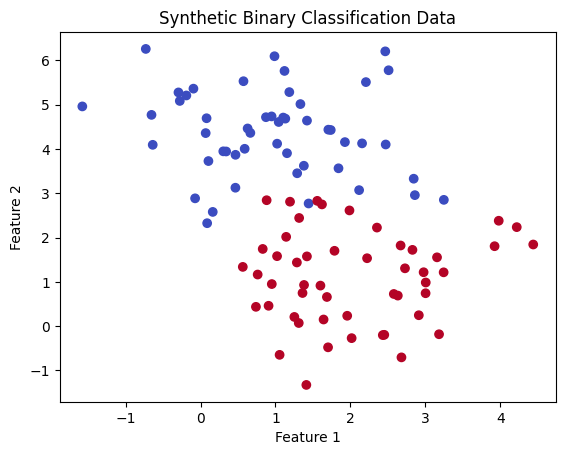

In [2]:
plt.scatter(X_numpy[:, 0], X_numpy[:, 1], c=y_numpy, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Binary Classification Data')
plt.show()

# Model Implementation 

We will implement a one-layer neural network manually.

**Initialize Parameters ((In the code, there are 2 marks that you need to complete))**

In [3]:
import torch
# Initialize weights and bias
torch.manual_seed(0)
# Randomly initialize a tensor of shape (2, 1). the requires_grad should be true (2 marks)
weights = torch.rand(2, 1, requires_grad=True)
bias = torch.zeros(1, requires_grad=True)

# Define the Model (In the code, there are 2 marks that you need to complete)

In [8]:
 # Multiply weights and inputs and add the bias as the input of the sigmoid function (2 marks)
def model(X):
    return torch.sigmoid(X@weights + bias)

# Define the Loss Function

We will use the Binary **Cross-Entropy** Loss:

In [9]:
def binary_cross_entropy(y_pred, y_true):
    epsilon = 1e-7  # To avoid log(0)
    y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)
    loss = - (y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred))
    return loss.mean()

# Training the Model (In the code, there are 6 marks that you need to complete)

In [10]:
learning_rate = 0.1
num_epochs = 1000

for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(X)
    
    # Calculate loss (2 marks)
    loss = binary_cross_entropy(y_pred, y)
    
    
    # Backward pass
    # Perform back propagation to calculate gradients (2 marks)
    loss.backward()
    
    # Update parameters
    with torch.no_grad():
        weights -= learning_rate * weights.grad
        bias -= learning_rate * bias.grad
    
    # Zero gradients
    weights.grad.zero_()
    bias.grad.zero_()
    
    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')
        

Epoch [100/1000], Loss: 0.2414
Epoch [200/1000], Loss: 0.2142
Epoch [300/1000], Loss: 0.1997
Epoch [400/1000], Loss: 0.1891
Epoch [500/1000], Loss: 0.1806
Epoch [600/1000], Loss: 0.1734
Epoch [700/1000], Loss: 0.1672
Epoch [800/1000], Loss: 0.1619
Epoch [900/1000], Loss: 0.1572
Epoch [1000/1000], Loss: 0.1530
